# Analyse des données

### Importation des données et premiers calculs

In [2]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler

df = pd.read_csv("segmentation data.csv")
df_features = df.drop(columns=["ID"])
print(df_features.describe())

               Sex  Marital status          Age   Education         Income  \
count  2000.000000     2000.000000  2000.000000  2000.00000    2000.000000   
mean      0.457000        0.496500    35.909000     1.03800  120954.419000   
std       0.498272        0.500113    11.719402     0.59978   38108.824679   
min       0.000000        0.000000    18.000000     0.00000   35832.000000   
25%       0.000000        0.000000    27.000000     1.00000   97663.250000   
50%       0.000000        0.000000    33.000000     1.00000  115548.500000   
75%       1.000000        1.000000    42.000000     1.00000  138072.250000   
max       1.000000        1.000000    76.000000     3.00000  309364.000000   

        Occupation  Settlement size  
count  2000.000000      2000.000000  
mean      0.810500         0.739000  
std       0.638587         0.812533  
min       0.000000         0.000000  
25%       0.000000         0.000000  
50%       1.000000         1.000000  
75%       1.000000         1.00

### Visualisation des différentes distributions

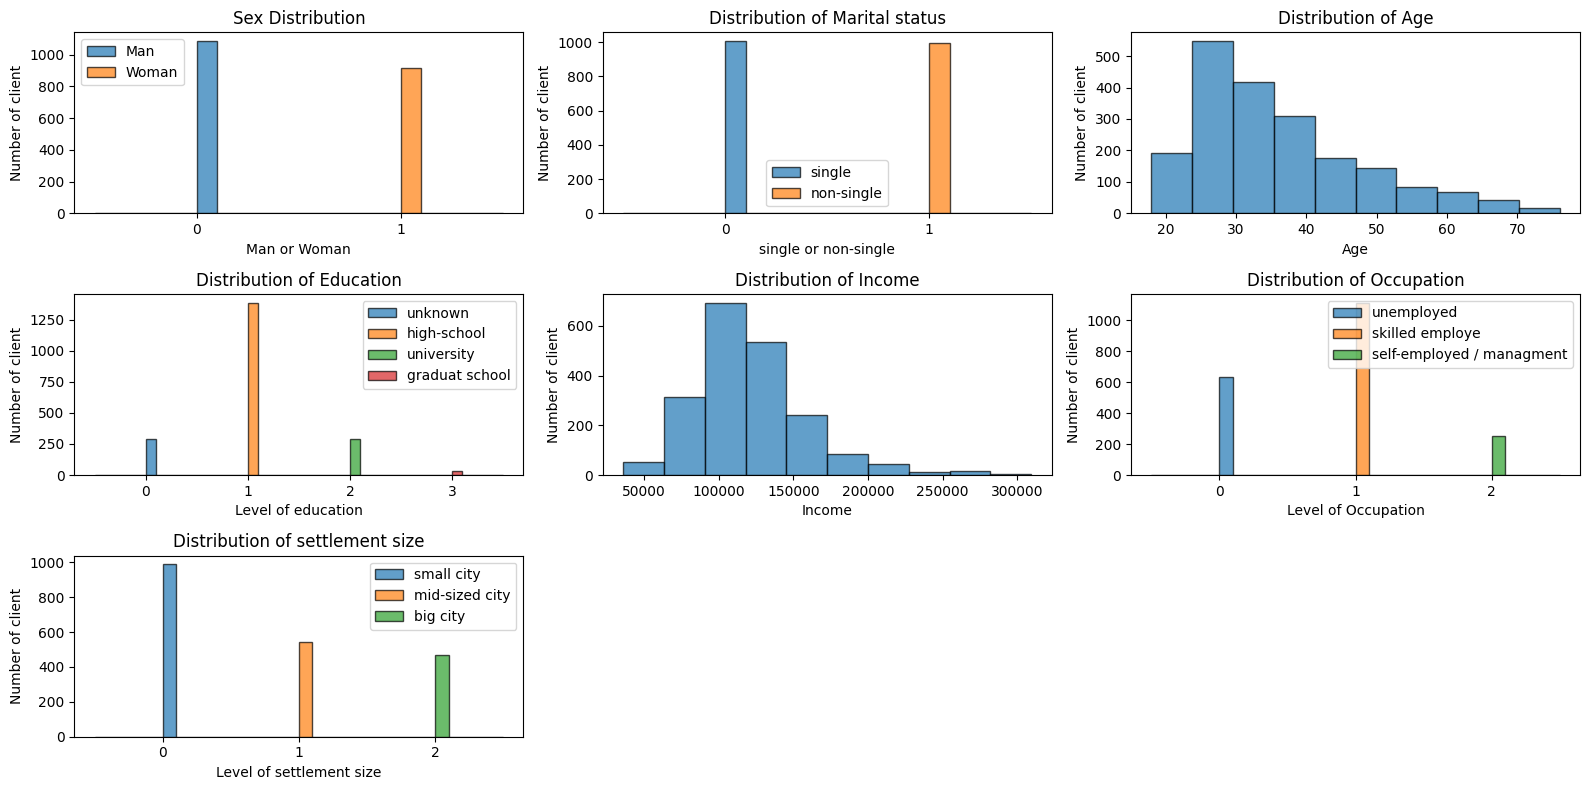

In [3]:
fig, axs = plt.subplots(3, 3, figsize=(16, 8))

axs = axs.flatten()  # simplifie l’accès : axs[0], axs[1], ...

# Désactiver les cases vides
for j in range(len(df_features.columns), len(axs)):
    axs[j].axis("off")

# Creat Sex distribution graph
data_0 = df[df["Sex"] == 0]["Sex"]
data_1 = df[df["Sex"] == 1]["Sex"]

axs[0].hist(data_0, edgecolor='black', alpha=0.7, label="Man")
axs[0].hist(data_1, edgecolor='black', alpha=0.7, label="Woman")
axs[0].set_xticks([0, 1])
axs[0].set_title("Sex Distribution")
axs[0].set_xlabel("Man or Woman")
axs[0].set_ylabel("Number of client")
axs[0].legend()

# Creat marital status
data_0 = df[df["Marital status"] == 0]["Marital status"]
data_1 = df[df["Marital status"] == 1]["Marital status"]

axs[1].hist(data_0, edgecolor='black', alpha=0.7, label="single")
axs[1].hist(data_1, edgecolor='black', alpha=0.7, label="non-single")
axs[1].set_xticks([0, 1])
axs[1].set_title("Distribution of Marital status")
axs[1].set_xlabel("single or non-single")
axs[1].set_ylabel("Number of client")
axs[1].legend()

# Creat Age distribution
axs[2].hist(df["Age"], edgecolor='black', alpha=0.7)
axs[2].set_title("Distribution of Age")
axs[2].set_xlabel("Age")
axs[2].set_ylabel("Number of client")

# Creat Education distribution
data_0 = df[df["Education"] == 0]["Education"]
data_1 = df[df["Education"] == 1]["Education"]
data_2 = df[df["Education"] == 2]["Education"]
data_3 = df[df["Education"] == 3]["Education"]

axs[3].hist(data_0, edgecolor='black', alpha=0.7, label="unknown")
axs[3].hist(data_1, edgecolor='black', alpha=0.7, label="high-school")
axs[3].hist(data_2, edgecolor='black', alpha=0.7, label="university")
axs[3].hist(data_3, edgecolor='black', alpha=0.7, label="graduat school")
axs[3].set_xticks([0, 1, 2, 3])
axs[3].set_title("Distribution of Education")
axs[3].set_xlabel("Level of education")
axs[3].set_ylabel("Number of client")
axs[3].legend()

# Creat Income distribution
axs[4].hist(df["Income"], edgecolor='black', alpha=0.7)
axs[4].set_title("Distribution of Income")
axs[4].set_xlabel("Income")
axs[4].set_ylabel("Number of client")

# Creat Occupation distribution
data_0 = df[df["Occupation"] == 0]["Occupation"]
data_1 = df[df["Occupation"] == 1]["Occupation"]
data_2 = df[df["Occupation"] == 2]["Occupation"]


axs[5].hist(data_0, edgecolor='black', alpha=0.7, label="unemployed")
axs[5].hist(data_1, edgecolor='black', alpha=0.7, label="skilled employe")
axs[5].hist(data_2, edgecolor='black', alpha=0.7, label="self-employed / managment")
axs[5].set_xticks([0, 1, 2])
axs[5].set_title("Distribution of Occupation")
axs[5].set_xlabel("Level of Occupation")
axs[5].set_ylabel("Number of client")
axs[5].legend()

# Creat settlement size
data_0 = df[df["Settlement size"] == 0]["Settlement size"]
data_1 = df[df["Settlement size"] == 1]["Settlement size"]
data_2 = df[df["Settlement size"] == 2]["Settlement size"]


axs[6].hist(data_0, edgecolor='black', alpha=0.7, label="small city")
axs[6].hist(data_1, edgecolor='black', alpha=0.7, label="mid-sized city")
axs[6].hist(data_2, edgecolor='black', alpha=0.7, label="big city")
axs[6].set_xticks([0, 1, 2])
axs[6].set_title("Distribution of settlement size")
axs[6].set_xlabel("Level of settlement size")
axs[6].set_ylabel("Number of client")
axs[6].legend()

plt.tight_layout()
plt.show()


### Normalisation des colonne continue "Age" et "Income"

In [4]:
cols_to_scale = ["Age","Income"]
X = df_features.copy()
scaler = StandardScaler()
X[cols_to_scale] = scaler.fit_transform(X[cols_to_scale])

### Importation des différents modèles et comparaison

Fonction de comparaison

In [5]:
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score

def evalutat_clustering(model, X, labels):
    return {
        "Silhouette": silhouette_score(X,labels),
        "Davis-Bouldin": davies_bouldin_score(X,labels),
        "Calinski-Harabsz": calinski_harabasz_score(X, labels)
    }

Teste des modèles pour k=3 ou k=4

In [6]:
# Test de KMeans
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans.fit_predict(X)
results_kmeans = evalutat_clustering(kmeans, X, kmeans_labels)

# Test de Agglomerativ Clustering
agg = AgglomerativeClustering(n_clusters=3)
agg_labels = agg.fit_predict(X)
results_agg = evalutat_clustering(agg, X, agg_labels)

# Test de DBSCAN
dbscan = DBSCAN(eps=0.8)
dbscan_labels = dbscan.fit_predict(X)
results_dbscan = evalutat_clustering(dbscan, X, dbscan_labels)

# Test Gaussian Mixture Model
gmm = GaussianMixture(n_components=3, random_state=42)
gmm_labels = gmm.fit_predict(X)
results_gmm = evalutat_clustering(gmm, X, gmm_labels)

Test des modèles

In [7]:
results = pd.DataFrame({
    "KMeans": results_kmeans,
    "Agglom": results_agg,
    "DBSCAN": results_dbscan,
    "GMM": results_gmm
})
print(results)

                      KMeans      Agglom      DBSCAN         GMM
Silhouette          0.251677    0.246882    0.277442    0.160249
Davis-Bouldin       1.396581    1.469163    1.377795    3.446939
Calinski-Harabsz  756.412899  648.525975  129.258899  367.737312


| Métrique                 | Valeurs possibles | Bonnes valeurs | Mauvaises valeurs | Interprétation |
|--------------------------|------------------|----------------|-------------------|----------------|
| **Silhouette Score**     | -1 à 1           | > 0.50 (bon)   | < 0.25            | Score élevé = clusters bien séparés et compacts |
| **Davies-Bouldin Index** | ≥ 0              | < 0.7 (bon)    | > 1.5             | Score faible = bonne séparation, clusters compacts |
| **Calinski-Harabasz**    | 0 à +∞           | > 500 (bon)    | < 100             | Plus la valeur est grande, meilleure est la séparation |

On observe que la silhouette est la plus élevé chez DBSCAN, ce qui indique que les clients d'un même groupe sont pluts proche les uns des autres, et bien mieux séparé des clients des autres groupes que dans les autres modèles. KMeans n'est pas très loin derrière, et est le seul autre modèle a ne pas avoir un score mauvais.

Davies-Bouldin qui indique la capacité de l'algorithme à former des cluster distincts, pas trop chevauché et bien séparé. Le score doit être le plus petit possible car il indique la compacité des cluster. Et là KMean perd à nouveau de peu face à DBSCAN, ce qui signifie que DBSCAN créer des cluster légèrement plus compacte.

Calinski-Harabsz qui indique le ratio entre la distance des cluster les uns par rapport aux autres et leur compacité.
Le score doit être le plus élevé possible. KMeans cette fois rempporte haut la main, DBSCAN fait de son côté à peinse passable.

Le modèle le plus intéressant a prendre est donc KMeans, malgrès des scores légèrement en dessous de DBSCAN sur 2 des testes. Il remporte haut la main le 3ème test, ce qui lui permet de compenser ses faiblesses passés.

Les bons scores observés sur DBSCAN peuvent s'expliquer par le faite qu'il ignore certaines donnée trop éloigné ce qui a tendance à améliorer son score. A l'inverse KMeans utilise toutes les données et obtiens des scores très proches de DBSCAN dans les 2 premières épreuves, ce qui viens appuyer sur sa robustesse supérieur dans notre cas.

### Modélisation des clusters via PCA

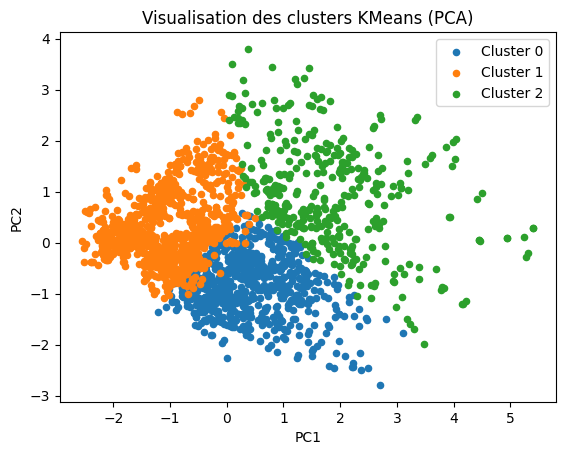

In [15]:
from sklearn.decomposition import PCA

clusters = kmeans_labels
df["Cluster"] = clusters

pca = PCA(n_components=2)
pca_data = pca.fit_transform(X)

for cluster in sorted (df["Cluster"].unique()):
    cluster_point = pca_data[df["Cluster"]==cluster]
    plt.scatter(cluster_point[:, 0], cluster_point[:, 1], s=20, label=f"Cluster {cluster}")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("Visualisation des clusters KMeans (PCA)")
plt.legend()
plt.show()

### Distribution de clusters

In [16]:
cluster_summary = df.groupby("Cluster").mean(numeric_only=True)
print(cluster_summary)

                   ID       Sex  Marital status        Age  Education  \
Cluster                                                                 
0        1.000007e+08  0.307263        0.452514  31.272346   0.811453   
1        1.000013e+08  0.624454        0.548035  32.001092   0.924672   
2        1.000008e+08  0.331522        0.453804  54.657609   1.760870   

                Income  Occupation  Settlement size  
Cluster                                              
0        133410.694134    1.182961         1.437151  
1         96653.431223    0.387555         0.040393  
2        157207.168478    1.138587         1.119565  


### Analyse des clusters

-------
#### Premier cluster:
On peut remarquer que le premier cluster semble correspondre à une partie de la population assez jeune. Avec un équilibre en filles et garçons, mais une très légère tendance vers les garçons. Plutôt célibataire en générale. Avec un niveau d'éducation standard, vivant dans des grandes villes, avec un travaille. Et par conséquant des revenues assez élevés.

-------
##### Deuxième cluster:
On peut remarquer que le deuxième cluster semble assi correspondre à une partie plutôt jeune de la population. Ayant aussi un équilibre filles garçons, mais un plus grande tendance vers les filles. Avec un plus grand tendance à être en couple. Avec un niveau d'étude standard, légèrement plus grand que dans le cluster précédant. Mais vivant dans des petite villes, ayant plus de difficulté à trouver un travail. Et par conséquant en moyenne des revennue plus faibles.

-------
##### Troisième cluster:
On peut remarquer que le troisième cluster semble correspondre à une part plus agé de la population. Ayant aussi un équilibre filles garçons, mais une légère tendance vers les garçons. Une tendance à être plutôt célibataire. Avec un niveau d'étude globalement supérieur à celui des 2 autres clusters. Ce groupe a plutôt tendance à vivre dans des villes moyennes. Avec aussi un travail. Et la plus grand rémunération de tous les clusters.

### Affichage possible aidant à analyser les clusters

C:\Users\USER\AppData\Local\Temp\ipykernel_36852\763422010.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df["Cluster"], y=df["Income"], palette="viridis")


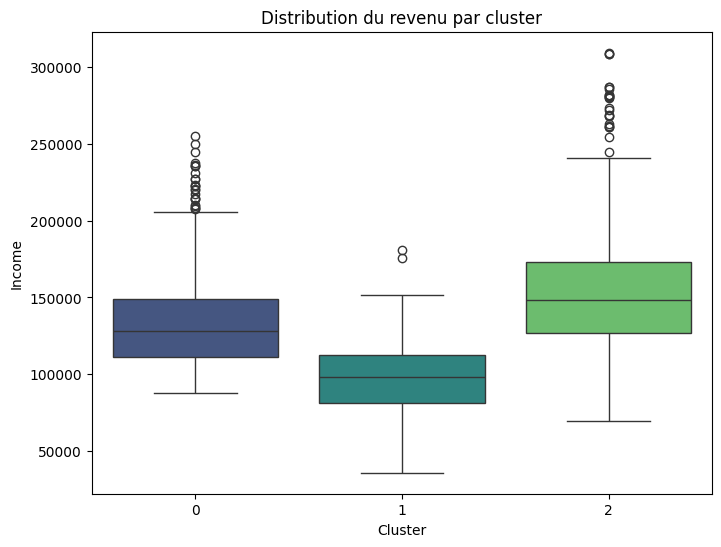

In [14]:
import seaborn as sns

plt.figure(figsize=(8,6))
sns.boxplot(x=df["Cluster"], y=df["Income"], palette="viridis")
plt.title("Distribution du revenu par cluster")
plt.xlabel("Cluster")
plt.ylabel("Income")
plt.show()